## 4918 Ткачев М.А.
---
#**Введение в анализ данных**
### Лабораторная работа №4 **ПРИМЕНЕНИЕ МЕТОДОВ КЛАССИФИКАЦИИ**
---
### Индивидуальный вариант №5
Датасет: ***5gym_churn.csv***
> Информация о заемщиках:
1. gender – Пол
2. near_location – Близкое расположение
3. partner – Сотрудник компании партнера
4. promo_friends – По промо друзей
5. phone – Указан ли телефон
6. contract_period – Длительность текущего абонемента
7. group_visits – Посещение групповых занятий
8. age – Возраст
9. avg_additional_charges_total – Средние траты на доп услуги
10. month_to_end_contract – Количество месяцев до окончания абонемента
11. lifetime – Время с момента первого обращения в фитнес-центр (в месяцах)
12. avg_class_frequency_total – Средняя частота посещений в неделю за все время с начала действия абонемента
13. avg_class_frequency_current_month – Средняя частота посещений в неделю за предыдущий месяц
14. churn – Факт ухода из клуба
















In [1]:
# Подключаем библиотеку для обработки и анализа данных
import pandas as pd

In [2]:
# Загружаем датасет
df=pd.read_csv('5gym_churn.csv', delimiter=',')

In [3]:
# Выводим информацию о данных датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
# Выводим первые 10 строк датасета
df.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


### Вывод

Ознакомившись с данные на первый взгляд с ними все хорошо только названия столбцов нужно привести к единому змеиному регистру, переименовывать не нужно так как названия столбцов соответствуют содержимому.

Типы данных также соответствуют.

# Предварительная подготовка данных

## Устранение проблем названий столбцов

In [5]:
# Вывели названия столбцов таблицы
print(*df.columns.tolist(), sep='\n')

gender
Near_Location
Partner
Promo_friends
Phone
Contract_period
Group_visits
Age
Avg_additional_charges_total
Month_to_end_contract
Lifetime
Avg_class_frequency_total
Avg_class_frequency_current_month
Churn


In [6]:
# Приведём названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
# Проверка
print(*df.columns.tolist(), sep='\n')

gender
near_location
partner
promo_friends
phone
contract_period
group_visits
age
avg_additional_charges_total
month_to_end_contract
lifetime
avg_class_frequency_total
avg_class_frequency_current_month
churn


### Вывод

Теперь названия столбцов имеют единый стиль змеиного регистра, что улучшает восприяние информации.

## Обработка пропусков

In [7]:
# поиск пустых значений
df.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

### Вывод

Пропусков в дата сете не оказалось, исправлять ничего не нужно – это упрощает нам работу.

## Устранение дубликатов 

In [8]:
# проверим, есть ли дубликаты в таблице
df.duplicated().sum()

0

### Вывод

Дубликаты отсутствуют.

## Обработка других ошибок в данных

In [9]:
import numpy as np
# посмотрим уникальные значения в столбцах
for i in df.columns:
  if i not in ['avg_additional_charges_total', 'month_to_end_contract', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    print('Столбец: ' + i, *np.sort(df[i].unique()),'_____________________________________', sep='\n')

Столбец: gender
0
1
_____________________________________
Столбец: near_location
0
1
_____________________________________
Столбец: partner
0
1
_____________________________________
Столбец: promo_friends
0
1
_____________________________________
Столбец: phone
0
1
_____________________________________
Столбец: contract_period
1
6
12
_____________________________________
Столбец: group_visits
0
1
_____________________________________
Столбец: age
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
41
_____________________________________
Столбец: lifetime
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
26
27
29
31
_____________________________________
Столбец: churn
0
1
_____________________________________


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


### Вывод

Проверив данные в столбцах на наличие ошибочных значений, не нашли их.

Все значения количественных значений в допустимых пределах, а категориальные данные не содержат ошибочных значений.

## Нормализация данных

Масштабирование данных будем производить с помощью класса MinMaxScaler() из модуля preprocessing библиотеки для машинного обучения sklearn, в результате мы получим значения параметров в диапозоне от 0 до 1.

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # создаём объект класса scaler
scaler.fit(df) # обучаем стандартизатор
df_sc = scaler.transform(df) # преобразуем набор данных

In [12]:
df_sc = pd.DataFrame(df_sc, columns = df.columns)

Посмотрели распределение признаков в дата сете.

<AxesSubplot: ylabel='Density'>

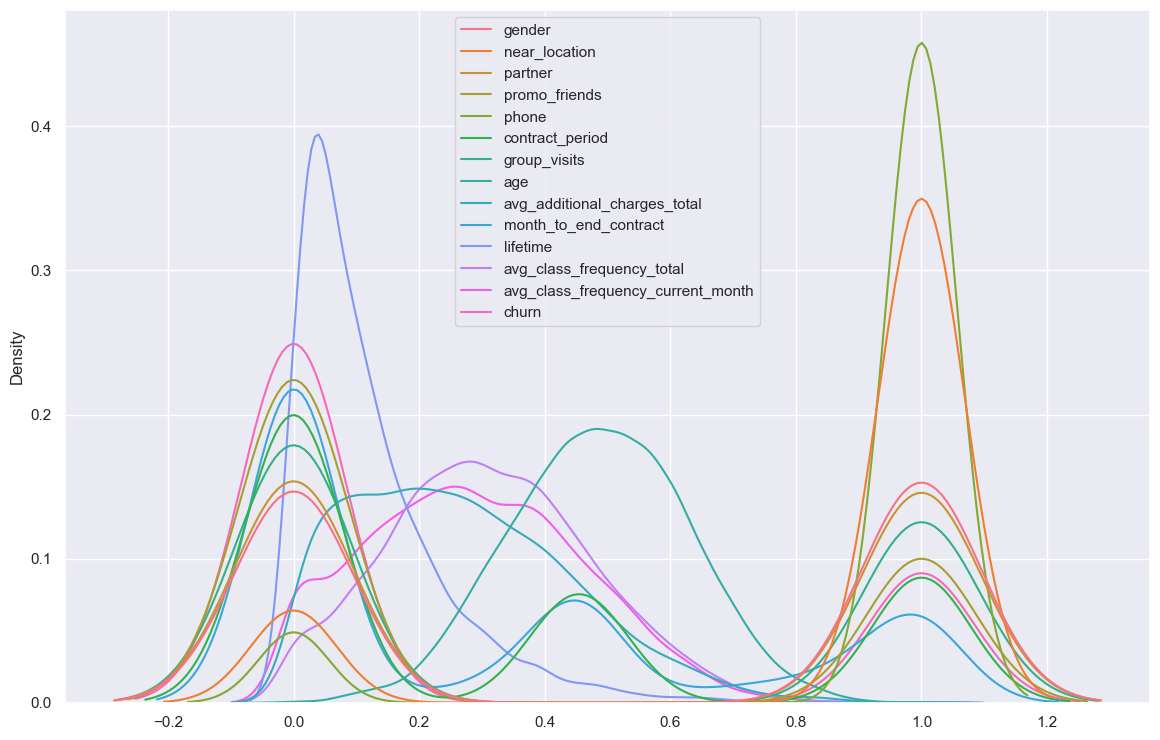

In [13]:
# Построение графика распределения признаков
import seaborn as sns

sns.set(rc={'figure.figsize':(14,9)})
sns.kdeplot(data=df_sc)

# Классификация данных

## Целевой признак

Целевым признаком для нашего набора данных является поле ***churn*** – *Факт ухода из клуба*. Поскольку основная задача бизнеса — это удержать постоянных клиентов, а для этого нужно понимать и прогнозировать, **когда?** и, **почему?** клиент может уйти чтобы предпринять какие-то действия по его удержанию.

Отделили матрицу ***объект-признаков X*** и ***вектор целевой переменной y*** с помощью метода **drop()** библиотеки Pandas, это необходимо для проведения корректного обучения

In [14]:
y = df_sc['churn']
X = df_sc.drop(['churn'], axis=1)

In [15]:
X.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,1.0,1.0,1.0,1.0,0.0,0.454545,1.0,0.478261,0.025485,0.363636,0.096774,0.003386,0.000000
1,0.0,1.0,0.0,0.0,1.0,1.000000,1.0,0.565217,0.204645,1.000000,0.225806,0.319230,0.310771
2,0.0,1.0,1.0,0.0,1.0,0.000000,0.0,0.434783,0.234052,0.000000,0.064516,0.308632,0.282506
3,0.0,1.0,1.0,1.0,1.0,1.000000,1.0,0.652174,0.113173,1.000000,0.064516,0.532173,0.546174
4,1.0,1.0,1.0,1.0,1.0,0.000000,0.0,0.347826,0.358796,0.000000,0.096774,0.184918,0.182222


In [16]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3995    0.0
3996    1.0
3997    0.0
3998    0.0
3999    0.0
Name: churn, Length: 4000, dtype: float64

## Разбиение набора данных на тренировочной и тестовый датасеты с помощью train_test_split

Размер тренировочной выборки 2500 записей что составляет 62,5% от общего количества записей 4000, и 1500 тестовая выборка.

Что результат разделения повторялся от запуска к запуску установили значение параметра random_state. 

In [17]:
# Импорт модуля для разбиения датасета на тренировочной и тестовый 
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.625, 
                                                    random_state=42)

In [18]:
# Проверка разбиения
import numpy as np


print(f"Количество строк в y_train по классам: {np.bincount(y_train)}") # 2500 записей в обучающей выборке
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")   # 1500 записей в тестовой выборке

Количество строк в y_train по классам: [1825  675]
Количество строк в y_test по классам: [1114  386]


## Разработка предсказательных моделей качественного отклика

### Метод k- ближайших соседей

Суть метода в отнесении объекта к какому-то классу на основании расстояния от него до центров кластеров, определённых моделью в процессе обучения.

Для классификации методом К-ближайших соседей воспользовались моделью, предоставляемой модулем KNeighborsClassifier из библиотеки Scikit-learn.

Обучение проводили на специально подготовленных данных X_train (объект-признаков) и y_train (вектор целевой переменной).


Задали параметр n_neighbors = 5, который обозначает количество кластеров алгоритма K-ближайших соседей. Занчение было получено в прошлой лабораторной работе при кластеризации агломеративно иерархическим методом.

In [19]:
# Импорт модели К-ближайших
from sklearn.neighbors import KNeighborsClassifier


# Создание обекта модели
KNeighbors_model = KNeighborsClassifier(n_neighbors = 5)
# KNeighbors_model = KNeighborsClassifier()   # Нет разницы AUC не меняется

# Обучение модели
KNeighbors_model.fit(X_train, y_train)

KNeighborsClassifier()

Сделали предсказание для тестовой части данных (X_test)

In [20]:
# Делаем предсказание
KNeighbors_pred = KNeighbors_model.predict(X_test)

### Логистическая регрессия

Суть метода в отнесении объекта к какому-то классу на основании его положения относительно плоскости, которая разбивает пространство объектов на кластеры (в нашем случае на два кластера). Положение плоскости в пространстве объектов определяется моделью в ходе обучения.

Для классификации методом Логической регрессии воспользовались моделью, предоставляемой модулем LogisticRegression из библиотеки Scikit-learn.

Обучение проводили на специально подготовленных данных X_train (объект-признаков) и y_train (вектор целевой переменной).

In [21]:
# Импорт модели Логической регресии
from sklearn.linear_model import LogisticRegression


# Создание обекта модели
LogisticReg_model = LogisticRegression()

# Обучение модели
LogisticReg_model.fit(X_train, y_train)

LogisticRegression()

Сделали предсказание для тестовой части данных (X_test)

In [22]:
# Делаем предсказание
LogisticReg_pred = LogisticReg_model.predict(X_test)

### Случайный лес

Суть метода состоит в использовании нескольких решающих деревьев. Само по себе решающее дерево предоставляет крайне невысокое качество классификации, но из-за большого их количества результат значительно улучшается.

Для классификации методом Случайный лес воспользовались моделью, предоставляемой модулем RandomForestClassifier из библиотеки Scikit-learn.

Обучение проводили на специально подготовленных данных X_train (объект-признаков) и y_train (вектор целевой переменной).

In [23]:
# Импорт модели Случайный лес
from sklearn.ensemble import RandomForestClassifier


# Создание обекта модели
RandForest_model = RandomForestClassifier()

# Обучение модели
RandForest_model.fit(X_train, y_train)

RandomForestClassifier()

Сделали предсказание для тестовой части данных (X_test)

In [24]:
# Делаем предсказание
RandForest_pred = RandForest_model.predict(X_test)

## Оценка ошибок классификации

### Метрика "Accuracy" (Доля правильных ответов)

Метрика показывает процент значений, которые модель угадала правильно при проверке на тестовых данных.

In [25]:
# Импорт метода для метрики "Accuracy"
from sklearn.metrics import accuracy_score


model_list = [['"К-ближайших"          :', KNeighbors_pred],
              ['"Логическая регрессия" :', LogisticReg_pred],
              ['"Случайный лес"        :', RandForest_pred]]

print('Оцека метрики "Accuracy" (Доля правильных ответов) для моделей:')
for pred in model_list:
  score = accuracy_score(y_test, pred[1]) # Оценка для модели
  print('\t>', pred[0], round(score, 4))

Оцека метрики "Accuracy" (Доля правильных ответов) для моделей:
	> "К-ближайших"          : 0.85
	> "Логическая регрессия" : 0.9127
	> "Случайный лес"        : 0.916


Самый лучший результат у модели Случайный лес точность предсказаний 92%, Логическая регрессия показала схожий, но немного хуже результат, а К-ближайших отстает в среднем на 6% от остальных.

### Метрика "Balanced accuracy" (Cбалансированная точность)

Показывает среднюю точность для классов, используется для оценки несбалансированных классов.

Особенно подходит нам, потому что у нас заметно больше отрицательных значений чем в сравнении с положительными в целевом признаке.

In [26]:
# Импорт метода для метрики "Balanced accuracy"
from sklearn.metrics import balanced_accuracy_score


model_list = [['"К-ближайших"          :', KNeighbors_pred],
              ['"Логическая регрессия" :', LogisticReg_pred],
              ['"Случайный лес"        :', RandForest_pred]]

print('Оцека метрики "Balanced accuracy" (Cбалансированная точность) для моделей:')
for pred in model_list:
  score = balanced_accuracy_score(y_test, pred[1]) # Оценка для модели
  print('\t>', pred[0], round(score, 4))

Оцека метрики "Balanced accuracy" (Cбалансированная точность) для моделей:
	> "К-ближайших"          : 0.7932
	> "Логическая регрессия" : 0.8667
	> "Случайный лес"        : 0.8766


Самый лучший результат у модели Случайный лес точность предсказаний 88%, Логическая регрессия показала схожий, но немного хуже результат, а К-ближайших отстает в среднем на 8% от остальных.

### Метрика "Precision" (Точность)

Метрика показывает какая доля прогнозов относительно "1" класса верна. То есть смотрим долю правильных ответов только среди целевого класса.

In [27]:
# Импорт метода для метрики "Precision"
from sklearn.metrics import precision_score


model_list = [['"К-ближайших"          :', KNeighbors_pred],
              ['"Логическая регрессия" :', LogisticReg_pred],
              ['"Случайный лес"        :', RandForest_pred]]

print('Оцека метрики "Precision" (Точность) для моделей:')
for pred in model_list:
  score = precision_score(y_test, pred[1]) # Оценка для модели
  print('\t>', pred[0], round(score, 4))

Оцека метрики "Precision" (Точность) для моделей:
	> "К-ближайших"          : 0.723
	> "Логическая регрессия" : 0.8739
	> "Случайный лес"        : 0.8672


Самый лучший результат у модели Случайный лес точность предсказаний 87%, Логическая регрессия показала схожий, но немного хуже результат, а К-ближайших отстает в среднем на 8% от остальных.

### Метрика "Recall" (Полнота)

Показывает, сколько реальных объектов "1" класса вы смогла обнаружить модель.

In [28]:
# Импорт метода для метрики "Recall"
from sklearn.metrics import recall_score


model_list = [['"К-ближайших"          :', KNeighbors_pred],
              ['"Логическая регрессия" :', LogisticReg_pred],
              ['"Случайный лес"        :', RandForest_pred]]

print('Оцека метрики "Recall" (Полнота) для моделей:')
for pred in model_list:
  score = recall_score(y_test, pred[1]) # Оценка для модели
  print('\t>', pred[0], round(score, 4))

Оцека метрики "Recall" (Полнота) для моделей:
	> "К-ближайших"          : 0.6762
	> "Логическая регрессия" : 0.772
	> "Случайный лес"        : 0.7953


Модель случайный лес очередной раз показывает лучший результат порядка 80%, логическая регрессия немного отстает от лучшего, а К-ближайших отстает от остальных в среднем на 10%.

### Метрика 'F1 score' (F-мера, Сбалансированная Точность/Полнота)

Данная метрика позволяет получить общую оценку для метрик Точности и Полноты, которая учитывает обе метрики при подсчетах.

In [29]:
# Импорт метода для метрики "F1 score"
from sklearn.metrics import f1_score


model_list = [['"К-ближайших"          :', KNeighbors_pred],
              ['"Логическая регрессия" :', LogisticReg_pred],
              ['"Случайный лес"        :', RandForest_pred]]

print('Оцека метрики "F1 score" (F-мера) для моделей:')
for pred in model_list:
  score = f1_score(y_test, pred[1]) # Оценка для модели
  print('\t>', pred[0], round(score, 4))

Оцека метрики "F1 score" (F-мера) для моделей:
	> "К-ближайших"          : 0.6988
	> "Логическая регрессия" : 0.8198
	> "Случайный лес"        : 0.8297


Полученный результат достаточно был достаточно предсказуем по результатам посчитанных ранее метрик. Случайный лес получил высшую оценку 83%, логическая регрессия всего на 1,5% отстает, а К-ближних снова с худшим результатом в примерно 70%.

## Матрица неточностей

Данныая матрица дает количественную отценку предсказаний данных моделью, показывая сколько положительных и отрицательных значений угаданно верно и ошибочно.

На основании данной матрицы производятся расчеты всех ранее полученных метрик, а на основании группы таких матриц, полученных при разных пороговых значениях, строится ROC-кривая.

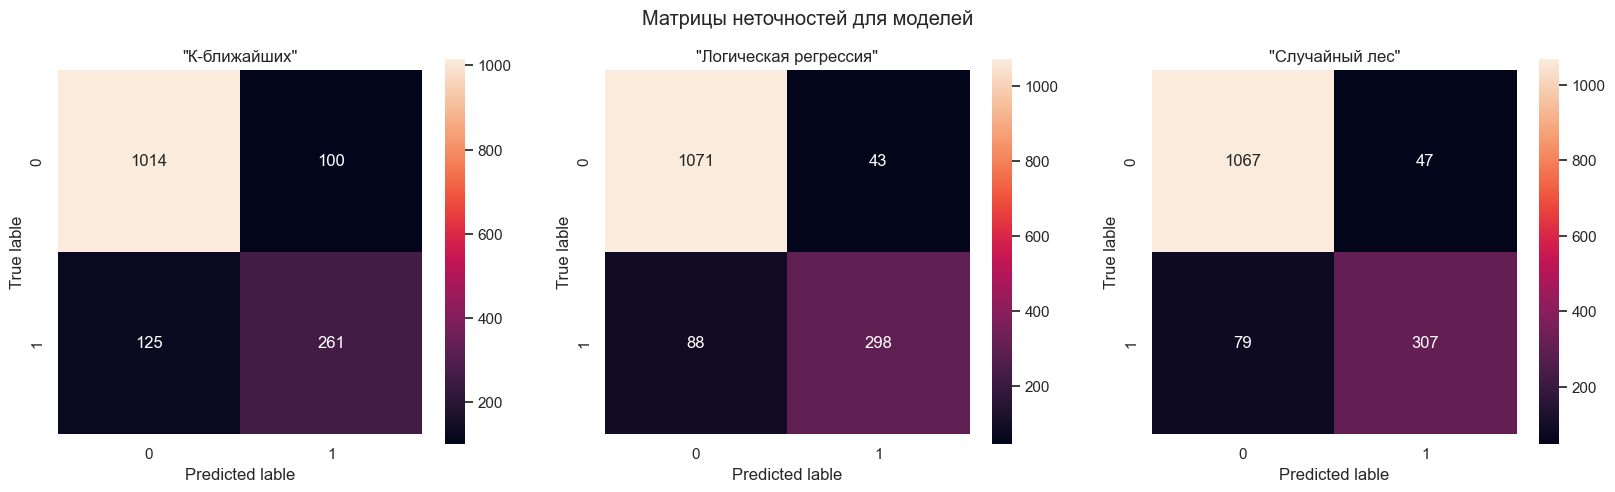

In [30]:
# Импорт модуля для постороения Матрицы неточностей
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import ConfusionMatrixDisplay    # 2 вариант построения
from matplotlib import pyplot as plt
from seaborn import heatmap


model_list = [['"К-ближайших"', KNeighbors_pred],
              ['"Логическая регрессия"', LogisticReg_pred],
              ['"Случайный лес"', RandForest_pred]]

fig, axis = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Матрицы неточностей для моделей')

for idx, pred in enumerate(model_list):
  heatmap(confusion_matrix(y_test, pred[1]), annot=True, fmt=".0f", square=True, ax=axis[idx])
  axis[idx].set_title(pred[0])
  axis[idx].set_xlabel('Predicted lable')
  axis[idx].set_ylabel('True lable')

  # ConfusionMatrixDisplay.from_predictions(y_test, pred[1], ax=axis[idx])    # 2 вариант построения

## Графики ROC-кривой

График ROC-кривой позволяет оценить при каком пороговом значении модель будет давать лучший результат при классификации данных.

Метрика AUC — это площадь под кривой ROC.

Общее правило гласит - чтобы определить оптимальную точку на кривой ROC нужно максимизировать разницу (True Positive Rate (TPR) - False Positive Rate (FPR)), которая на графике представлена вертикальным расстоянием между полученной ROC-кривой и диагональной линией из точки (0, 0) в (1, 1).


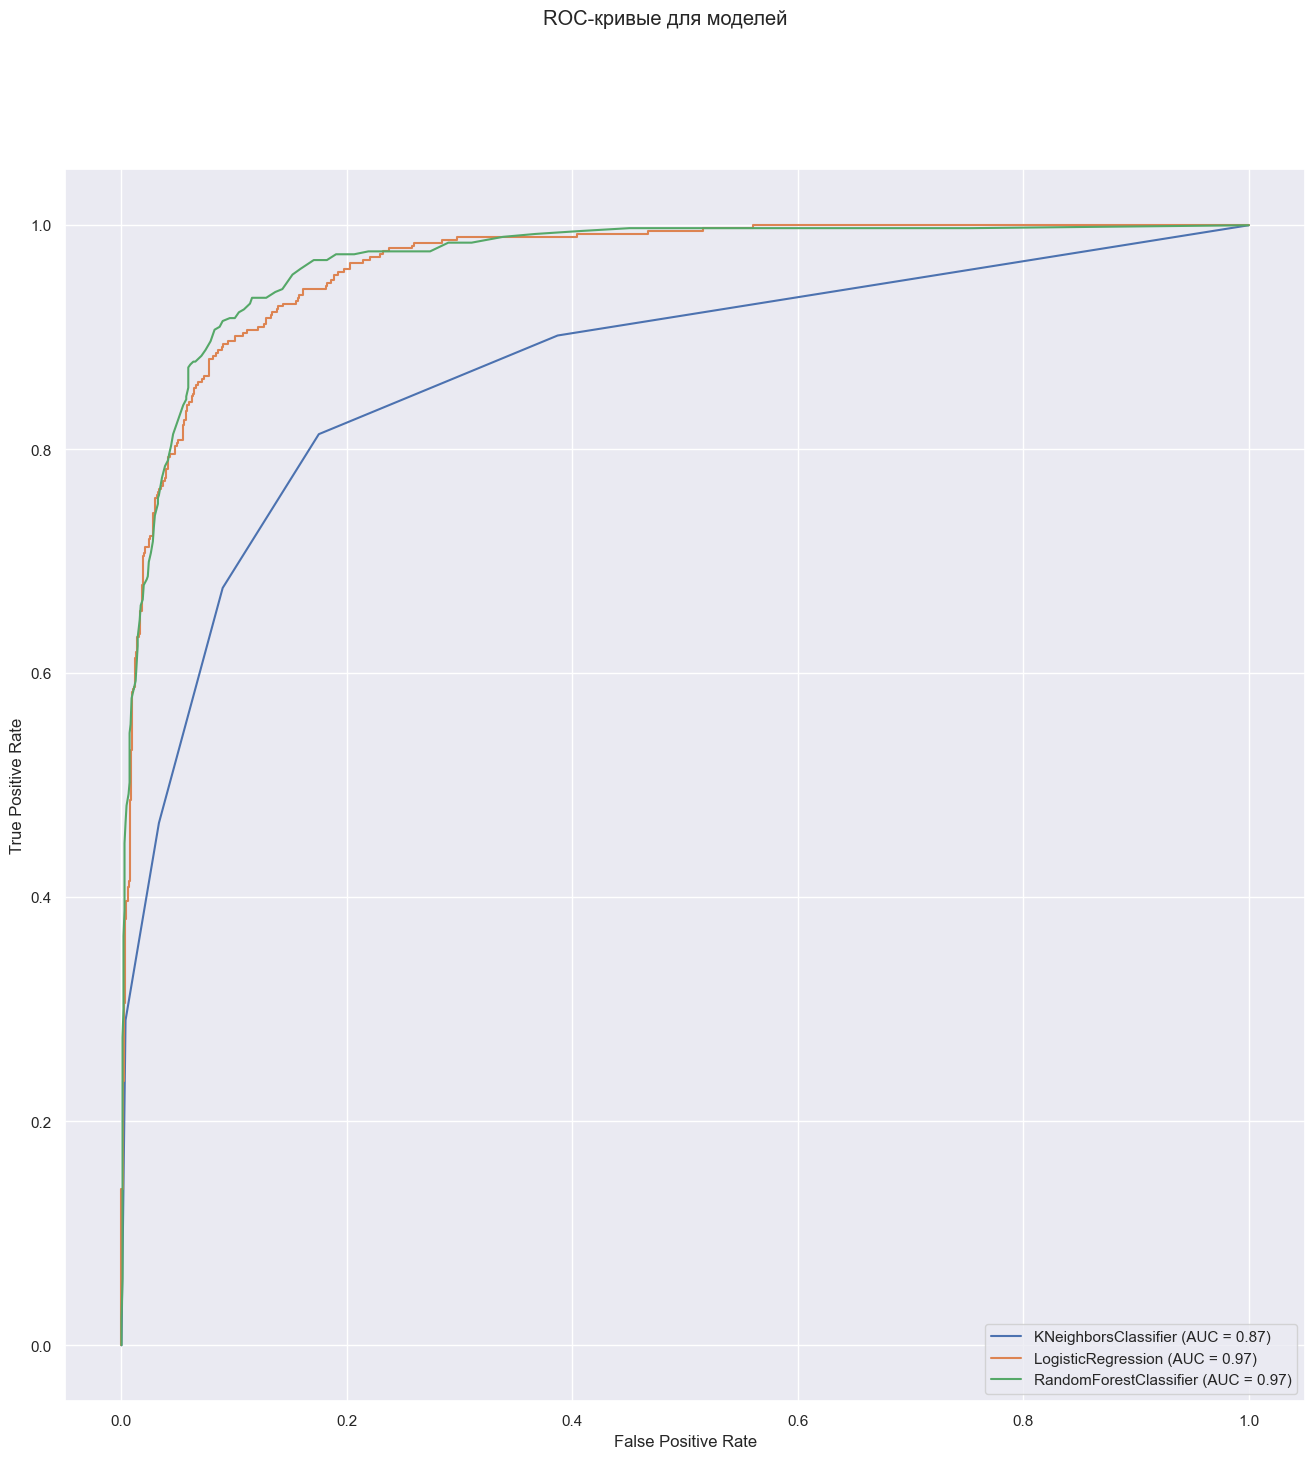

In [33]:
# Импорт модуля для построения 
from sklearn.metrics import RocCurveDisplay
from matplotlib import pyplot as plt

model_list = [['"К-ближайших"', KNeighbors_model],
              ['"Логическая регрессия"', LogisticReg_model],
              ['"Случайный лес"', RandForest_model]]

fig, axis = plt.subplots(figsize=(16, 16))
fig.suptitle('ROC-кривые для моделей')

for idx, model in enumerate(model_list):
  RocCurveDisplay.from_estimator(model[1], X_test, y_test, ax=axis)
  axis.set_xlabel('False Positive Rate')
  axis.set_ylabel('True Positive Rate')


Оценка AUC показывает неплохие результаты для всех моделей, но самый лучший у моделей Логической регрессии и Случайного леса.

## ВЫВОДЫ

В ходе данной лабораторной работы мы подготовили датасет, провели на этих данных обучение различных моделей для задачи классификации и провели оценку качества.

Подготовили датасет с информацией о клиентах фитнес-клуба, исправив ошибки с названиями, в остальном данные были валидны.

Затем, чтобы можно было провести обучение моделей классификации, стандартизировали данные, чтобы установить подходящие размерности параметров.

Обучили три различные модели с применением методов K-ближайших соседей, Логической регрессии и Случайного леса.

Для нашей задачи лучше всего себя показала модель классификатора на основе метода Случайного леса, во всех метриках результаты превышали 0,8 и доходили в плоть до 0,97 – это очень хороший результат говорящий о том, что ошибки есть но они минимальны, поэтому точность предсказаний будет весьма хорошая.

Модель Логической регрессии показала немного худшие на схожие с моделью случайного леса оценки метрик.

Модель К-ближайших соседей не подходит для нашей задачи так как значительно уступает остальным по качеству получаемых прогнозов.